In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [5]:
#load dataset
df = pd.read_csv("../data/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### **Phase 1**

In [6]:
# How many rows and columns are in the dataset?
df.shape

(270, 14)

In [7]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

#### **PHASE 1 — SUMMARY**
- The dataset contains 270 patient records and 14 columns related to heart disease diagnosis. The **target variable is Heart Disease**, a binary categorical feature indicating the presence or absence of heart disease.
- While some features are truly numerical, several features are categorical variables encoded as numbers, which must be treated as categorical during EDA to avoid incorrect interpretations.

### **Phase 2**


In [8]:
# Are there any missing values in the dataset?
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

#### **PHASE 2 — SUMMARY**
-  The dataset contains no missing values and no duplicate records. Data types are consistent.
- The dataset is structurally clean and suitable for further exploratory analysis without immediate data quality corrections.

### **PHASE 3 — TARGET VARIABLE ANALYSIS**


<Axes: xlabel='Heart Disease', ylabel='count'>

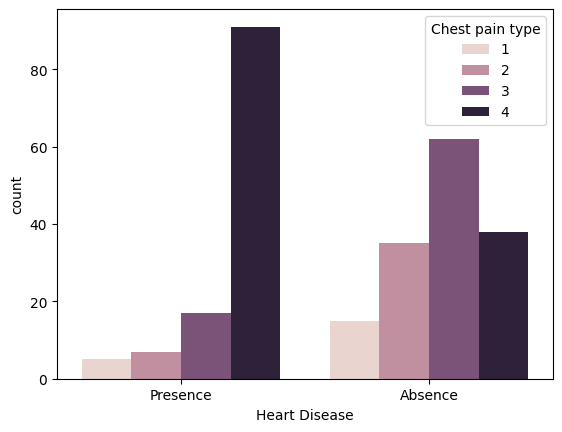

In [10]:
sb.countplot(data=df, x='Heart Disease', hue='Chest pain type')

In [11]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [12]:
df['Heart Disease'].value_counts(normalize=True)*100

Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64

<Axes: xlabel='Heart Disease', ylabel='count'>

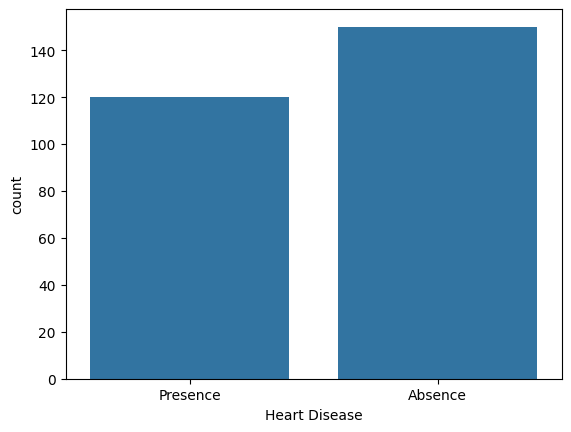

In [13]:
sb.countplot(data=df, x='Heart Disease')

### **PHASE 3 - SUMMARY**
- The target variable is binary, with Absence slightly more frequent than Presence, indicating a mild class imbalance. 
- Heart disease cases are relatively common, suggesting the dataset likely represents a hospital or high-risk population. 
- This baseline understanding is important for interpreting feature relationships and evaluating modeling strategies.

#### **Phase 4 - UNIVARIATE ANALYSIS**

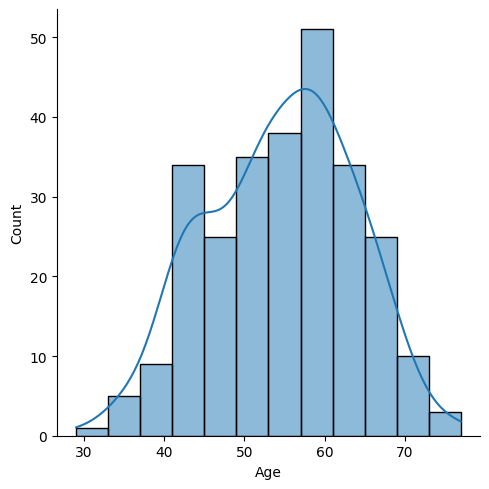

In [14]:
sb.displot(df['Age'], kind='hist', kde=True)

<Axes: xlabel='Age'>

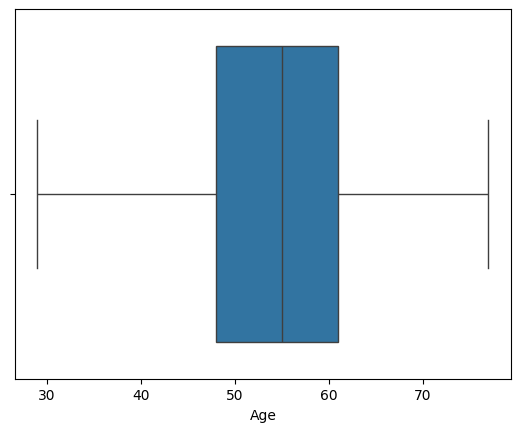

In [15]:
sb.boxplot(data=df, x = 'Age')

*Age shows a slightly right-skewed distribution centered around middle age. The boxplot indicates no extreme outliers, and the age range appears medically plausible for a heart-disease dataset.*

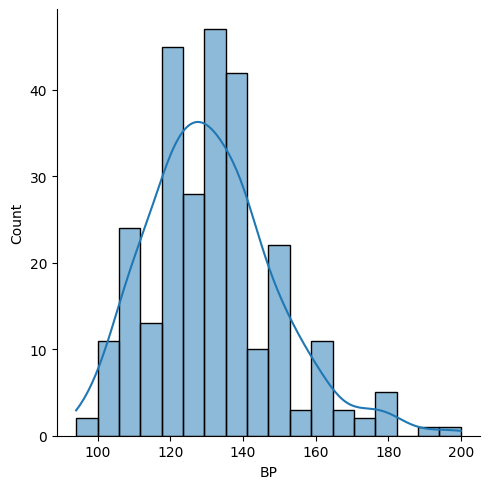

In [16]:
sb.displot(df['BP'], kde = True)


<Axes: xlabel='BP'>

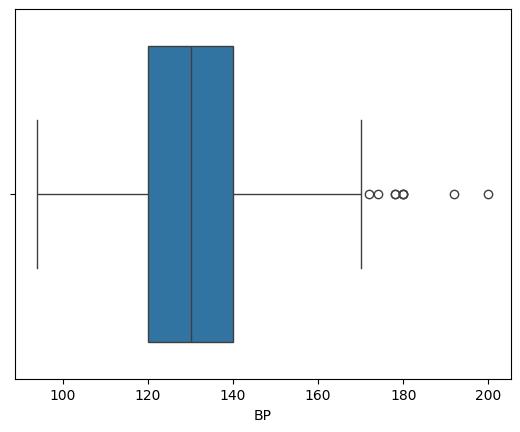

In [17]:
sb.boxplot(data=df, x = 'BP')


*BP shows a right-skewed distribution with most values concentrated between 120–140. The distribution has moderate spread and several high-end outliers*

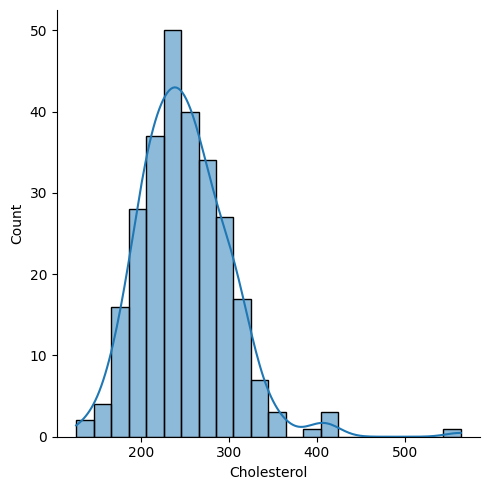

In [18]:
sb.displot(df['Cholesterol'], kde=True)

<Axes: xlabel='Cholesterol'>

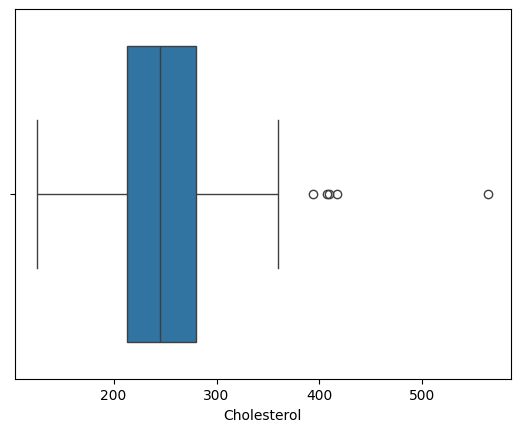

In [19]:
sb.boxplot(data=df,x='Cholesterol')

*Cholestrol shows a right-skewed unimodal distribution with most values concentrated at 200 - 300. The distribution has moderate spread and several high-end outliers*

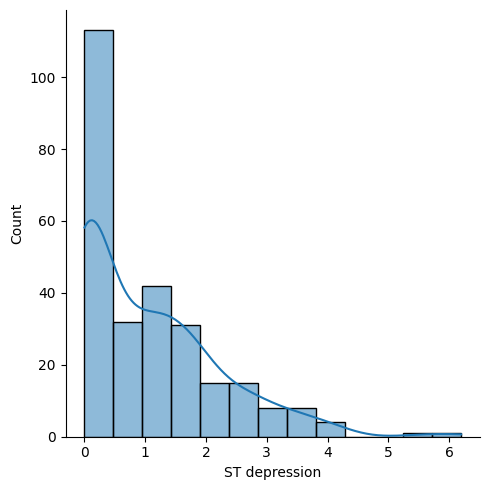

In [20]:
sb.displot(df['ST depression'], kde=True)

<Axes: ylabel='ST depression'>

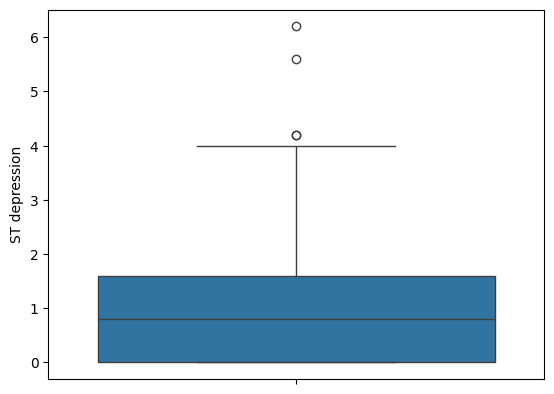

In [21]:
sb.boxplot(df['ST depression'])

*ST depression show extremely right-skewed unimodal distribution most values concentrated at 0-2. The distribution is highly asymmetric, with a long right tail and several high-end outliers*

<Axes: xlabel='Sex', ylabel='count'>

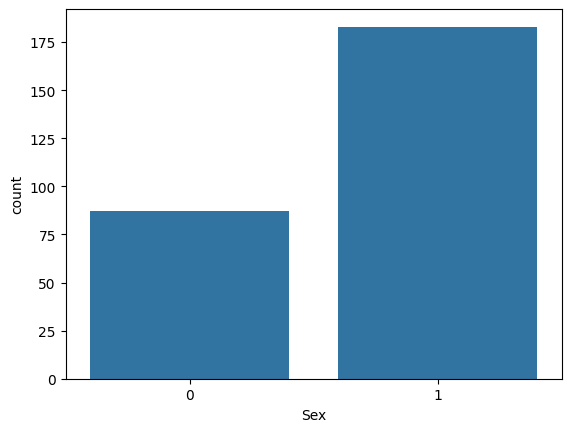

In [22]:
sb.countplot(data=df, x='Sex')

*Sex is a binary categorical feature with two categories. The dataset is male-dominant, with males appearing more frequently than females.*

<Axes: xlabel='Chest pain type', ylabel='count'>

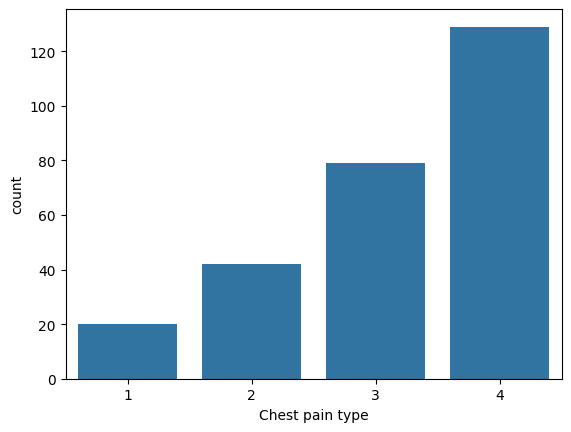

In [23]:
sb.countplot(data = df, x = 'Chest pain type')

*Chest pain type is multi-category feature with 4 categories.The distribution is imbalanced, with category 4 being the most frequent, while other categories appear less frequently.*

<Axes: xlabel='FBS over 120', ylabel='count'>

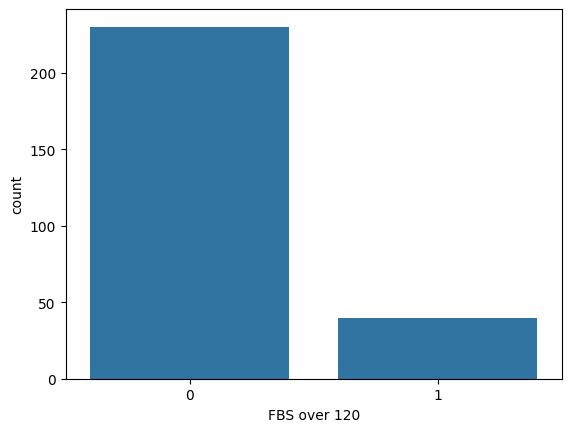

In [24]:
sb.countplot(data=df, x= 'FBS over 120')

*FBS over 120 is binary categorical feature with two categories. he distribution is imbalanced, with category 0 being the dominant class.*

<Axes: xlabel='EKG results', ylabel='count'>

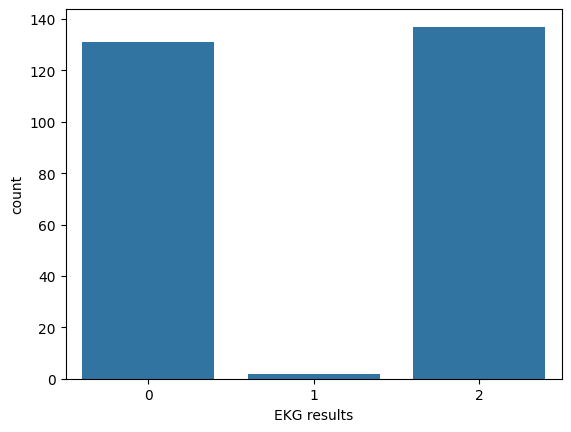

In [25]:
sb.countplot(data=df, x = 'EKG results')

*EKG results is a multi-class categorical feature with three categories (0, 1, and 2). The distribution is imbalanced, with category 2 being the most frequent, while category 1 is rare.*

<Axes: xlabel='Exercise angina', ylabel='count'>

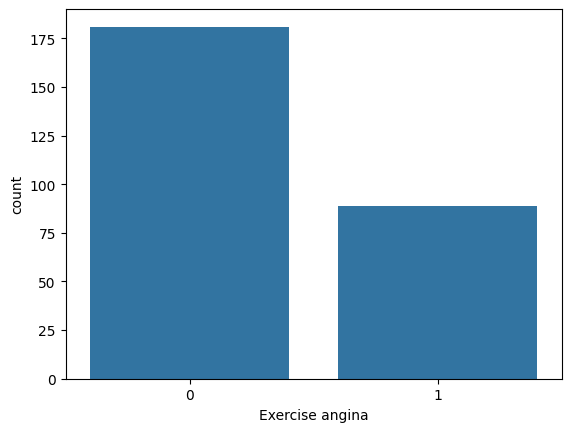

In [26]:
sb.countplot(data=df, x= 'Exercise angina')

*Exercise angina is binary categorical feature with two categories.The distribution is imbalanced with category 0 being dominant class*

<Axes: xlabel='Slope of ST', ylabel='count'>

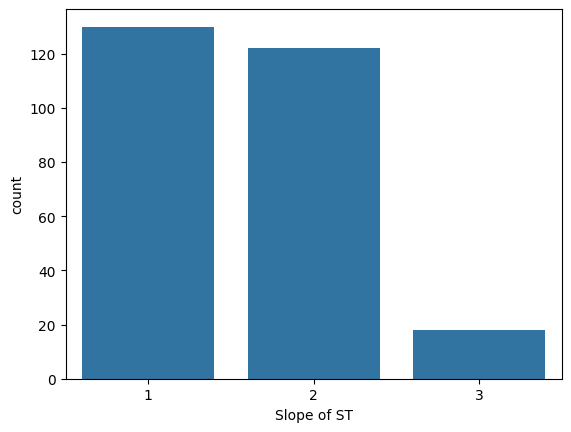

In [27]:
sb.countplot(data = df, x= 'Slope of ST')

*Slope of ST is multi-categorical feature with three categories.The distribution is imbalanced with category 1 being slightly dominant that category 2 and category 3 being rarely appearing*

<Axes: xlabel='Number of vessels fluro', ylabel='count'>

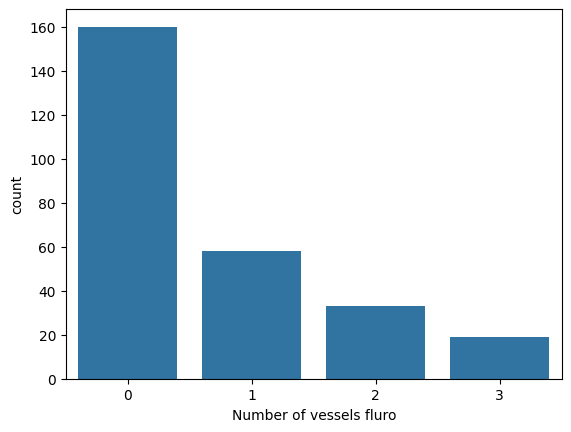

In [28]:
sb.countplot(data=df, x= 'Number of vessels fluro')

*Number of vessels fluro is multi-categorical feature with 4 categories(0,1,2,3).the distribution is imbalanced with category 0 being dominant class than other categories*

<Axes: xlabel='Thallium', ylabel='count'>

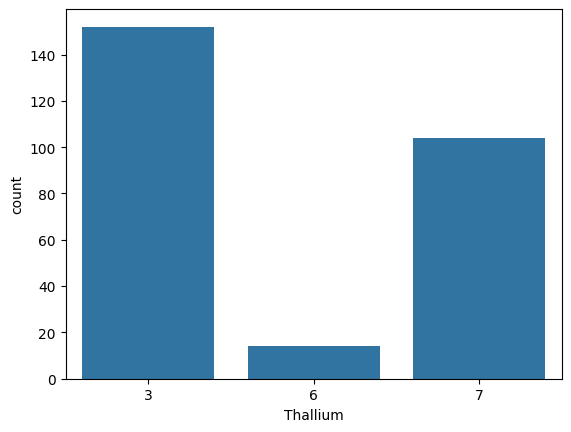

In [29]:
sb.countplot(data=df, x= 'Thallium')

*Thallium is multi-categorical feature with three categories(3,6,7).The distribution is imbalanced with category 3 being dominant class than other categories while category 6 appears rarely*

#### **Phase 5 - BIVARIATE ANALYSIS(Target v/s Feature)**

Text(0.5, 1.0, 'Heart Disease Distribution by Sex')

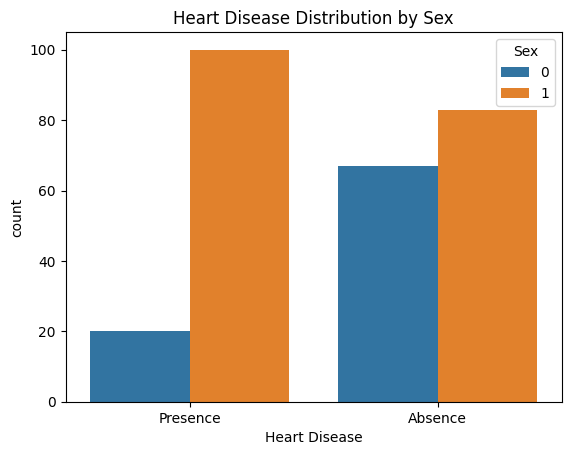

In [30]:
sb.countplot(data=df, x = 'Heart Disease', hue = 'Sex')
plt.title('Heart Disease Distribution by Sex')

*Heart disease presence appears more frequent in males compared to females, suggesting a potential association between sex and heart disease prevalence in this dataset.*

Text(0.5, 1.0, 'Heart Disease Distribution by FBS over 120')

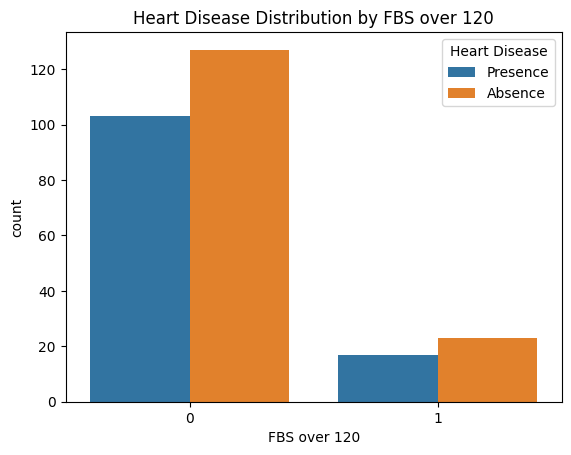

In [31]:
sb.countplot(data=df, x = 'FBS over 120', hue = 'Heart Disease')
plt.title('Heart Disease Distribution by FBS over 120')

*High fasting blood sugar (FBS > 120) appears relatively infrequent in both heart disease Presence and Absence groups. There is no strong visual difference in FBS distribution between the two groups, suggesting only a weak or unclear association between FBS and heart disease in this dataset*

Text(0.5, 1.0, 'Heart Disease Distribution by Exercise angina')

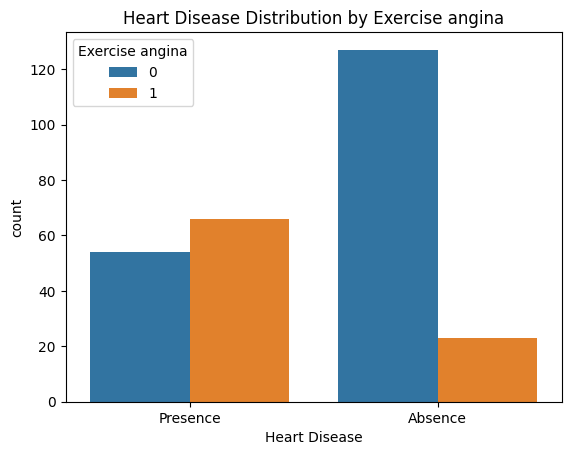

In [32]:
sb.countplot(data=df, x = 'Heart Disease', hue = 'Exercise angina')
plt.title('Heart Disease Distribution by Exercise angina')

*Exercise-induced angina appears more frequent among patients with heart disease compared to those without heart disease, suggesting a potential association between exercise angina and heart disease presence in this dataset.*

Text(0.5, 1.0, 'Heart Disease Distribution by Age')

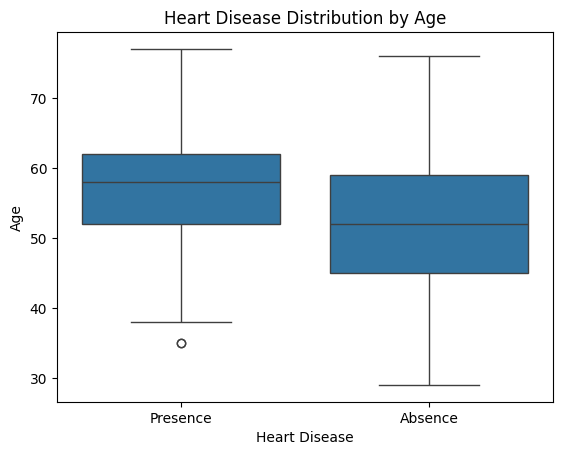

In [33]:
sb.boxplot(data=df, x = 'Heart Disease', y = 'Age')
plt.title('Heart Disease Distribution by Age')

*Patients with heart disease tend to have a higher median age compared to those without heart disease. However, there is substantial overlap between the age distributions, suggesting a moderate association. A few low-end age outliers are present in the heart disease group.*

Text(0.5, 1.0, 'Heart Disease Distribution by BP')

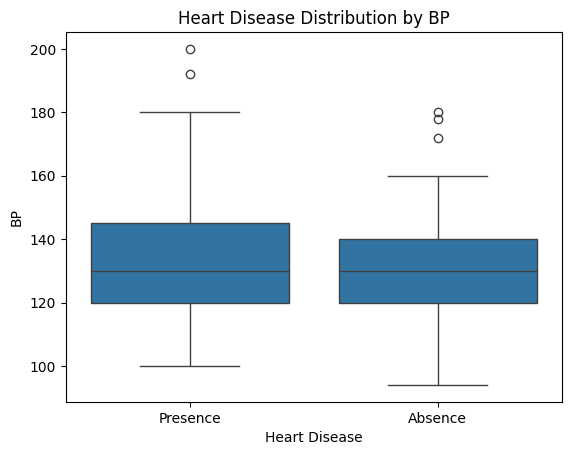

In [34]:
sb.boxplot(data=df, x = 'Heart Disease',y = 'BP')
plt.title('Heart Disease Distribution by BP')

*Blood pressure distributions for patients with and without heart disease show substantial overlap, with similar medians and spreads. Multiple high-end outliers are present in both groups, suggesting that BP alone has limited ability to distinguish heart disease presence in this dataset.*

Text(0.5, 1.0, 'Heart Disease Distribution by Cholestrol')

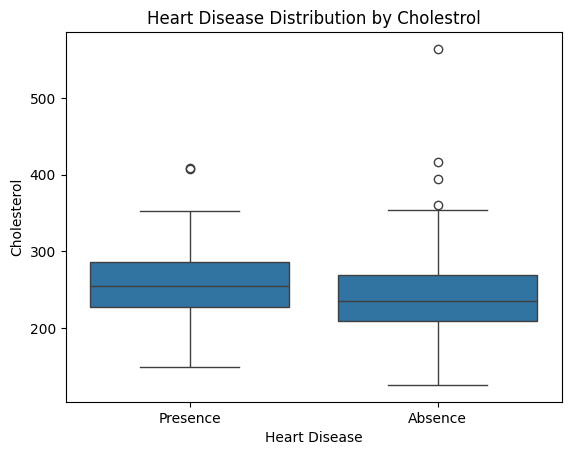

In [35]:
sb.boxplot(data=df, x = 'Heart Disease', y ='Cholesterol')
plt.title('Heart Disease Distribution by Cholestrol')

*Patients with heart disease tend to have a higher median cholesterol compared to those without heart disease. However, there is substantial overlap between the cholesterol distributions, suggesting a moderate association. A few high-end cholesterol outliers are present in the both groups*

Text(0.5, 1.0, 'Heart Disease Distribution by ST depression')

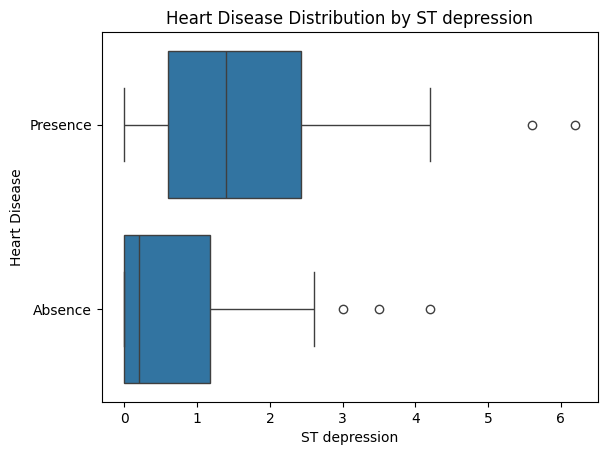

In [36]:
sb.boxplot(data=df, x = 'ST depression', y = 'Heart Disease')
plt.title('Heart Disease Distribution by ST depression')

*Patients with heart disease tend to have a higher median ST depression compared to those without heart disease. While some overlap exists between the distributions, the separation is more pronounced than for other numerical features, suggesting a relatively stronger association. Several high-end ST depression outliers are present in both groups.*

Text(0.5, 1.0, 'Heart Disease Distribution by Max HR')

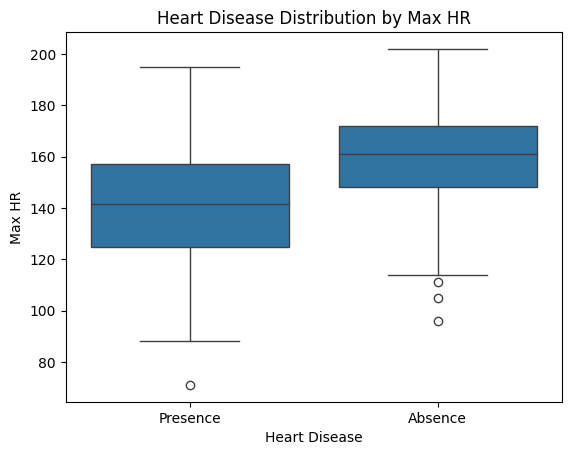

In [37]:
sb.boxplot(data=df, x = 'Heart Disease', y = 'Max HR')
plt.title('Heart Disease Distribution by Max HR')

*Patients without heart disease tend to have a higher median maximum heart rate compared to patients with heart disease. Although there is some overlap between the distributions, the shift in medians suggests a moderate to strong negative association between Max HR and heart disease presence. A few low-end outliers are present in both groups*

In [38]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<Axes: xlabel='Heart Disease', ylabel='count'>

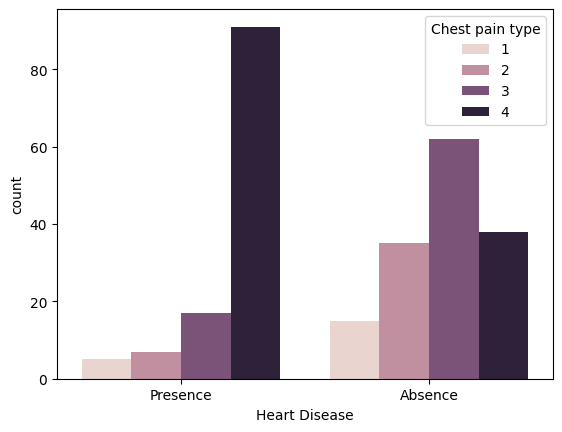

In [39]:
sb.countplot(data = df,x = 'Heart Disease', hue = 'Chest pain type')

*Heart disease presence varies substantially across chest pain types. Chest pain type 4 shows a notably higher number of heart disease cases compared to other types, while types 1 and 2 are more frequently associated with absence of heart disease. This suggests a strong association between chest pain type and heart disease presence in this dataset.*

<Axes: xlabel='Age', ylabel='Chest pain type'>

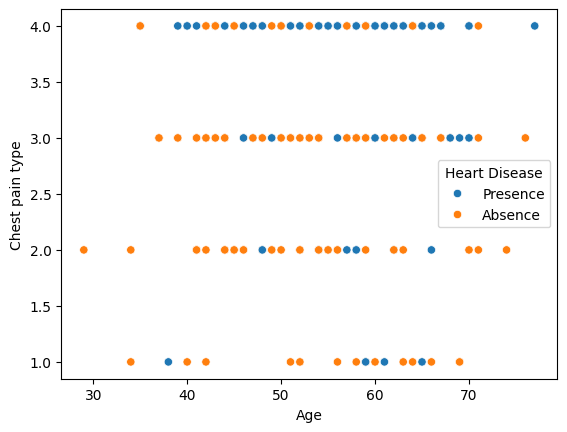

In [40]:
#Numerical v/s categorical v/s target
sb.scatterplot(data=df, x = 'Age', y = 'Chest pain type', hue = 'Heart Disease')

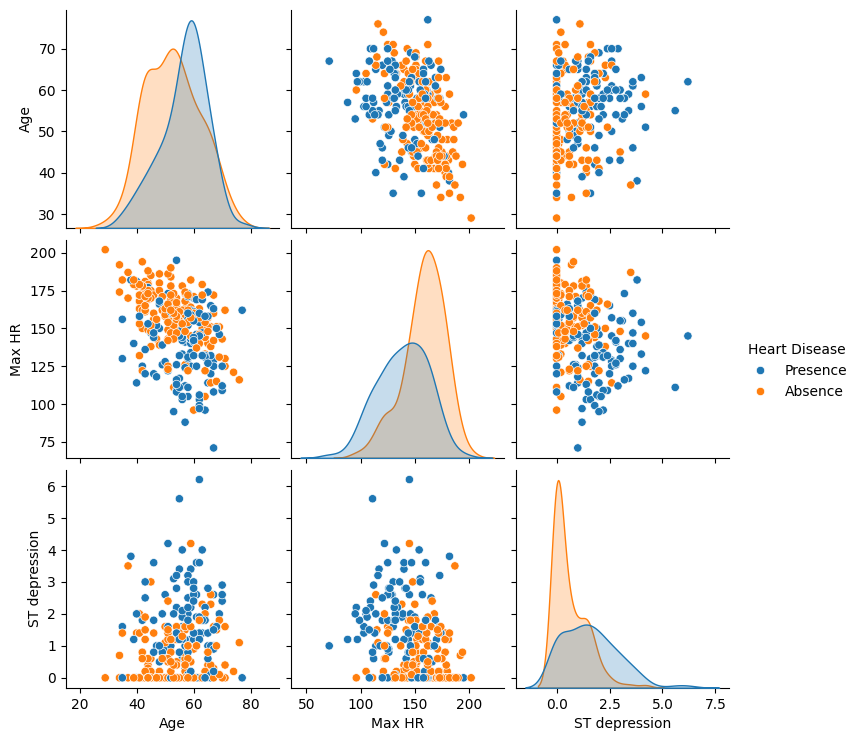

In [41]:
sb.pairplot(
    df[['Age', 'Max HR', 'ST depression', 'Heart Disease']],
    hue='Heart Disease'
)


*Multivariate analysis shows that heart disease presence is associated with higher ST depression and lower maximum heart rate, while age shows a weaker separation. Although individual features exhibit overlap, their combined patterns provide clearer differentiation between heart disease presence and absence.*

## **EDA Summary**: 
- The dataset contains 270 patient records with demographic, clinical, and diagnostic features related to heart disease. The target variable is binary, with a mild class imbalance and a relatively high disease prevalence, suggesting a hospital-based population.

- Univariate analysis revealed skewed distributions and medically plausible outliers in several numerical features, including blood pressure, cholesterol, and ST depression. Categorical features showed imbalanced category distributions, with certain categories dominating, particularly in chest pain type and thallium-related variables.

- Bivariate analysis identified strong associations between heart disease presence and chest pain type, ST depression, exercise-induced angina, and maximum heart rate. Age demonstrated a moderate relationship with heart disease, while blood pressure and cholesterol exhibited substantial overlap between disease classes, limiting their standalone discriminatory power.

- Multivariate analysis showed that feature combinations provide clearer separation between heart disease presence and absence than individual variables. In particular, patients exhibiting higher ST depression and lower maximum heart rate clustered more strongly within the heart disease group. While age alone showed considerable overlap, its interaction with exercise tolerance and ECG-related features enhanced class distinction. These findings indicate that heart disease risk in this dataset is better explained through the interaction of multiple clinical indicators rather than isolated measurements.

Overall, the dataset contains informative features with meaningful interactions, but also notable overlap between classes, reinforcing the need for multivariate modeling approaches for effective heart disease prediction.